In [3]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter
# import seaborn as sns

/root/anaconda3/envs/xw_unlearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/xw_unlearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/anaconda3/envs/xw_unlearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/anaconda3/envs/xw_unlearning/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: Future

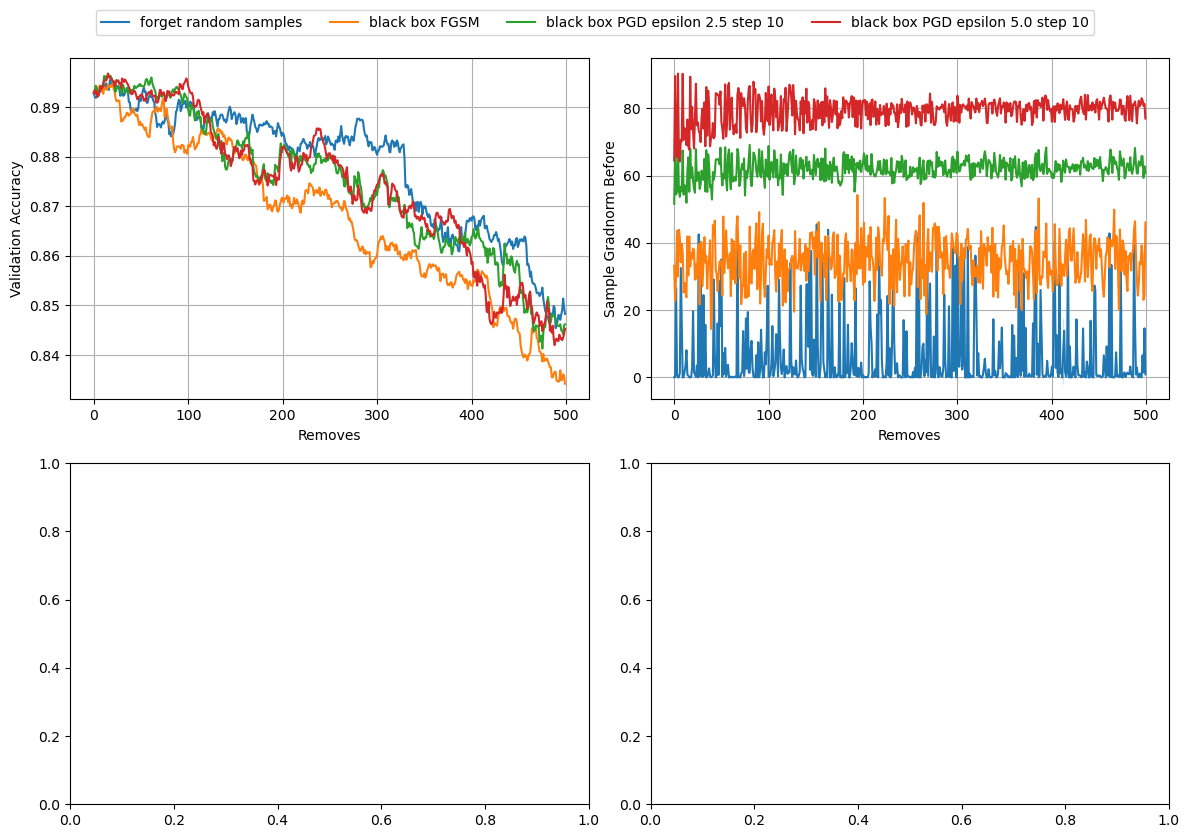

In [8]:
# 读取5个文件到dataframe
df1 = pd.read_csv('results_origin/mnist_logistic_FOCI.csv')
df2 = pd.read_csv('results_origin/black_box_0.5_mnist_logistic_FOCI.csv')
df3 = pd.read_csv('results_mnist/mnist_logistic(as_epsilon_2.5)_FOCI.csv')
df4 = pd.read_csv('results_mnist/mnist_logistic(as_epsilon_5)_FOCI.csv')
# 为每个数据框添加一个标签列
df1['Label'] = 'forget random samples'
df2['Label'] = 'black box FGSM'
df3['Label'] = 'black box PGD epsilon 2.5 step 10'
df4['Label'] = 'black box PGD epsilon 5.0 step 10'


# 数据平滑和异常值移除函数
def smooth_and_remove_outliers(data):
    # 使用Savitzky-Golay滤波器进行数据平滑
    smoothed_data = savgol_filter(data, 5, 2)
    # 移除异常值（这里假设异常值为大于平均值两倍的点）
    # mean_val = np.mean(smoothed_data)
    # return np.where(smoothed_data <= mean_val * 2, smoothed_data, mean_val)
    return smoothed_data

# 合并所有数据框
df_all = pd.concat([df1, df2, df3, df4])
colors = ['b', 'g', 'r', 'c', 'm']

# 创建一个2x2的子图网格
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Y轴标签
y_labels = ['val_acc_after', 'sample_gradnorm_before', ]
y_titles = ['Validation Accuracy', 'Sample Gradnorm Before']
palette = sns.color_palette("BuPu", 1)
# 绘制四个图
for ax, y_label, y_title in zip(axs.flat, y_labels, y_titles):
    sns.lineplot(x='n_removals', y=y_label, hue='Label', data=df_all, ax=ax, errorbar='sd')
    # sns.lineplot(x='n_removals', y=y_label, hue='Label', data=df1, ax=ax, errorbar='sd',linewidth=3,palette=palette)
    ax.set_xlabel('Removes')
    ax.set_ylabel(y_title)
    ax.grid(True)
    ax.get_legend().remove()  # 移除每个子图的图例

# 添加一个全局图例
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles[:], labels[:], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5)

# 显示图表
plt.tight_layout()
plt.show()


In [12]:
df1['slices_to_update'].mean()

2.834

: 

In [7]:
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Resize, RandomCrop, RandomHorizontalFlip

train_transformation = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,)),
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=train_transformation)
val_dataset = MNIST(root='./data', train=False, download=True, transform=train_transformation)


In [9]:
train_dataset[0][1]

5

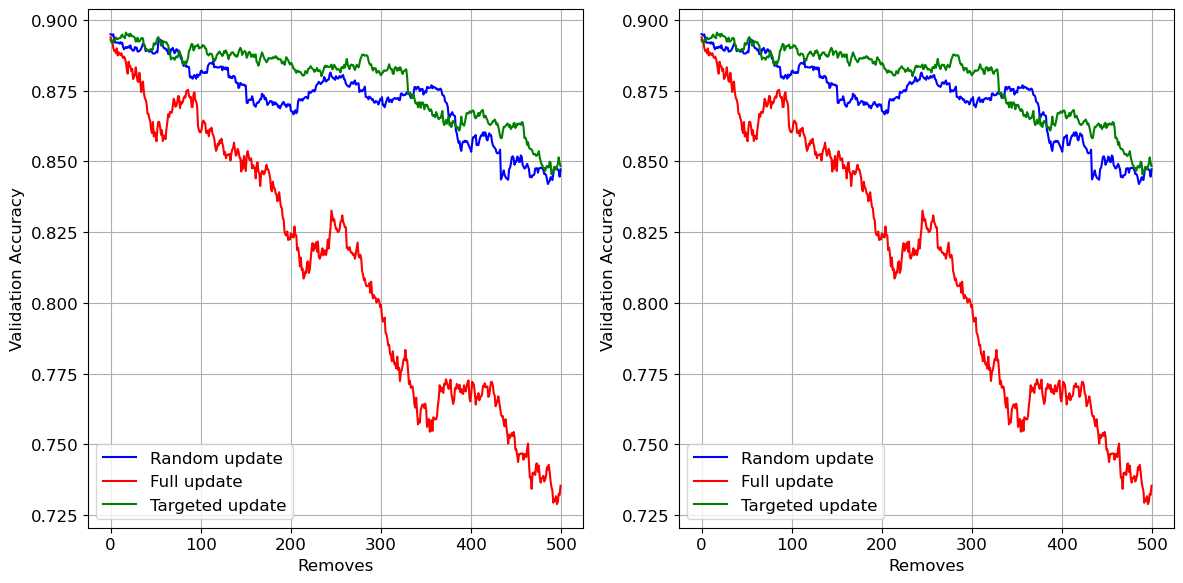

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 文件路径列表，确保按实际路径替换
group1_files = ['results_origin/mnist_logistic_Random.csv', 'results_origin/mnist_logistic_Full.csv', 'results_origin/mnist_logistic_FOCI.csv']
group2_files = ['results_origin/mnist_logistic_Random.csv', 'results_origin/mnist_logistic_Full.csv', 'results_origin/mnist_logistic_FOCI.csv']

def plot_data(files, subplot):
    colors = ['b', 'r', 'g', 'c']  # 颜色列表
    labels = ['Random update', 'Full update', 'Targeted update']
    for i, file in enumerate(files):
        data = pd.read_csv(file)
        subplot.plot(data['n_removals'], data['val_acc_after'], label=labels[i], color=colors[i])
        subplot.set_xlabel('Removes')
        subplot.set_ylabel('Validation Accuracy')
        subplot.legend()
        subplot.grid(True)  # 启用背景网格

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 创建1行2列的子图

# 绘制第一组数据
plot_data(group1_files, ax1)

# 绘制第二组数据
plot_data(group2_files, ax2)

plt.tight_layout()
plt.show()


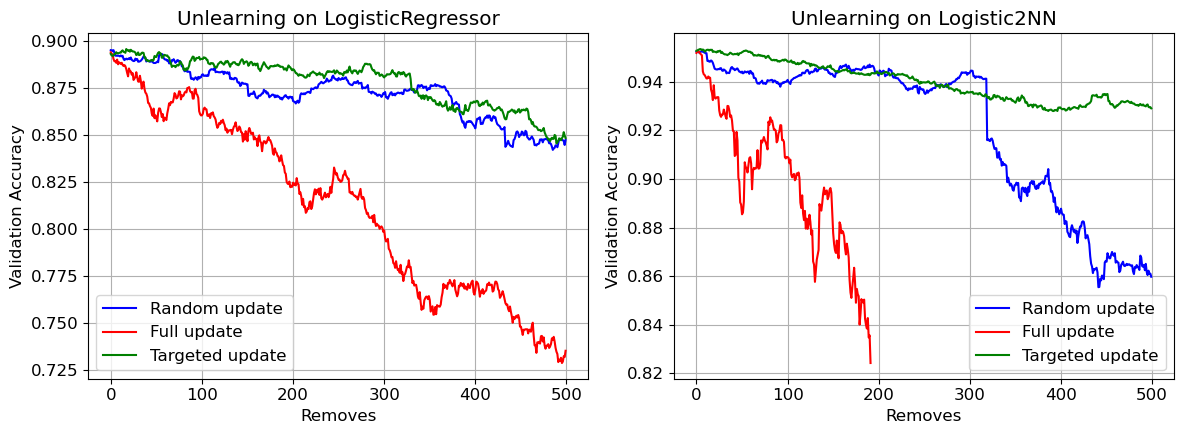

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# 文件路径列表，确保按实际路径替换
group1_files = ['results_origin/mnist_logistic_Random.csv', 'results_origin/mnist_logistic_Full.csv', 'results_origin/mnist_logistic_FOCI.csv']
group2_files = ['results/mnist_2nn_Random.csv', 'results/mnist_2nn_Full.csv', 'results/mnist_2nn_FOCI.csv']

def plot_data(files, subplot, title):
    colors = ['blue', 'red', 'green', 'purple', 'cyan', 'orange', 'pink', 'brown', 'indigo', '#FFDD44']  # 确保颜色数量与文件数量一致
    labels = ['Random update', 'Full update', 'Targeted update']
    for i, file in enumerate(files):
        data = pd.read_csv(file)
        subplot.plot(data['n_removals'], data['val_acc_after'], label=labels[i], color=colors[i])
        subplot.set_xlabel('Removes')
        subplot.set_ylabel('Validation Accuracy')
        subplot.legend()
        subplot.grid(True)  # 启用背景网格
        subplot.set_title(title)  # 设置子图的标题

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))  # 创建1行2列的子图

# 绘制第一组数据，添加标题
plot_data(group1_files, ax1, "Unlearning on LogisticRegressor")

# 绘制第二组数据，添加标题
plot_data(group2_files, ax2, "Unlearning on Logistic2NN")

plt.tight_layout()
plt.show()



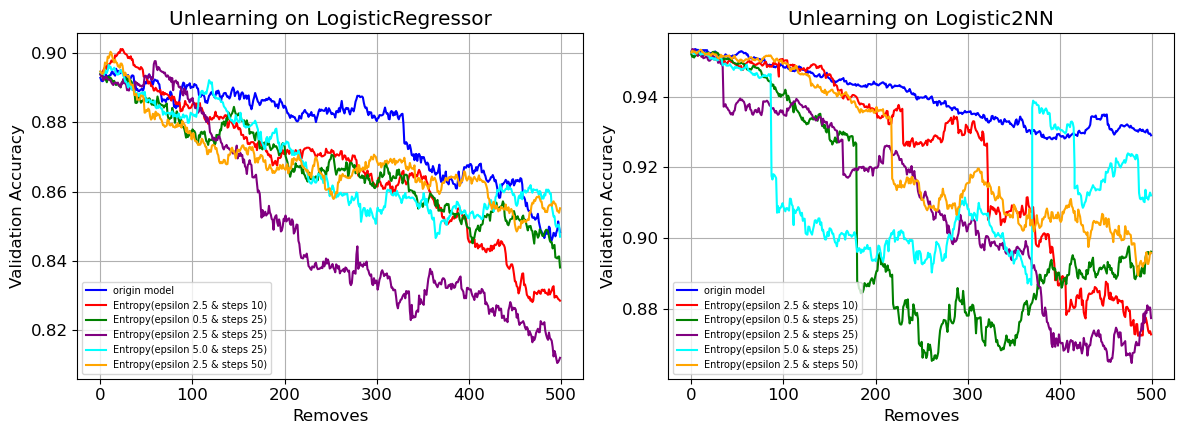

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# 全部
# group1_files = ['results_origin/mnist_logistic_FOCI.csv', 'results_origin/black_box_0.5_mnist_logistic_FOCI.csv', 'results_mnist/mnist_logistic(as_epsilon_2.5)_FOCI.csv', 'results_mnist/mnist_logistic(as_epsilon_5)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_10steps_2.5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_25steps_0.5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_25steps_2.5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_25steps_5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_50steps_2.5e)_FOCI.csv']
# group2_files = ['results/mnist_2nn_FOCI.csv', 'results/mnist_2nn(FGSM)_FOCI.csv', 'results/mnist_2nn(PGD_epsilon2.5_steps25)_FOCI.csv', 'results/mnist_2nn(PGD_epsilon5.0_steps25)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon2.5_steps10)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon0.5_steps25)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon2.5_steps25)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon5.0_steps25)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon2.5_steps50)_FOCI.csv']
# 仅对抗样本
# group1_files = ['results_origin/mnist_logistic_FOCI.csv', 'results_origin/black_box_0.5_mnist_logistic_FOCI.csv', 'results_mnist/mnist_logistic(as_epsilon_2.5)_FOCI.csv', 'results_mnist/mnist_logistic(as_epsilon_5)_FOCI.csv']
# group2_files = ['results/mnist_2nn_FOCI.csv', 'results/mnist_2nn(FGSM)_FOCI.csv', 'results/mnist_2nn(PGD_epsilon2.5_steps25)_FOCI.csv', 'results/mnist_2nn(PGD_epsilon5.0_steps25)_FOCI.csv']
# 仅熵损失
group1_files = ['results_origin/mnist_logistic_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_10steps_2.5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_25steps_0.5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_25steps_2.5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_25steps_5e)_FOCI.csv', 'results_mnist/mnist_logistic(black_entropy_attack_50steps_2.5e)_FOCI.csv']
group2_files = ['results/mnist_2nn_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon2.5_steps10)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon0.5_steps25)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon2.5_steps25)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon5.0_steps25)_FOCI.csv', 'results/mnist_2nn(Entropy_epsilon2.5_steps50)_FOCI.csv']

def plot_data(files, subplot, title):
    colors = ['blue', 'red', 'green', 'purple', 'cyan', 'orange', 'pink', 'brown', 'indigo', '#FFDD44']  # 确保颜色数量与文件数量一致
    # 全部
    # labels = ['origin model', 'FGSM', 'PGD(epsilon 2.5)', 'PGD(epsilon 5.0)', 'Entropy(epsilon 2.5 & steps 10)', 'Entropy(epsilon 0.5 & steps 25)', 'Entropy(epsilon 2.5 & steps 25)', 'Entropy(epsilon 5.0 & steps 25)', 'Entropy(epsilon 2.5 & steps 50)']
    # 仅对抗样本
    # labels = ['origin model', 'FGSM', 'PGD(epsilon 2.5)', 'PGD(epsilon 5.0)']
    # 仅熵损失
    labels = ['origin model', 'Entropy(epsilon 2.5 & steps 10)', 'Entropy(epsilon 0.5 & steps 25)', 'Entropy(epsilon 2.5 & steps 25)', 'Entropy(epsilon 5.0 & steps 25)', 'Entropy(epsilon 2.5 & steps 50)']
    
    for i, file in enumerate(files):
        data = pd.read_csv(file)
        subplot.plot(data['n_removals'], data['val_acc_after'], label=labels[i], color=colors[i])
        subplot.set_xlabel('Removes')
        subplot.set_ylabel('Validation Accuracy')
        subplot.legend(fontsize=7)  # 设置较小的字体大小
        subplot.grid(True)  # 启用背景网格
        subplot.set_title(title)  # 设置子图的标题

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))  # 创建1行2列的子图

# 绘制第一组数据，添加标题
plot_data(group1_files, ax1, "Unlearning on LogisticRegressor")

# 绘制第二组数据，添加标题
plot_data(group2_files, ax2, "Unlearning on Logistic2NN")

plt.tight_layout()
plt.show()


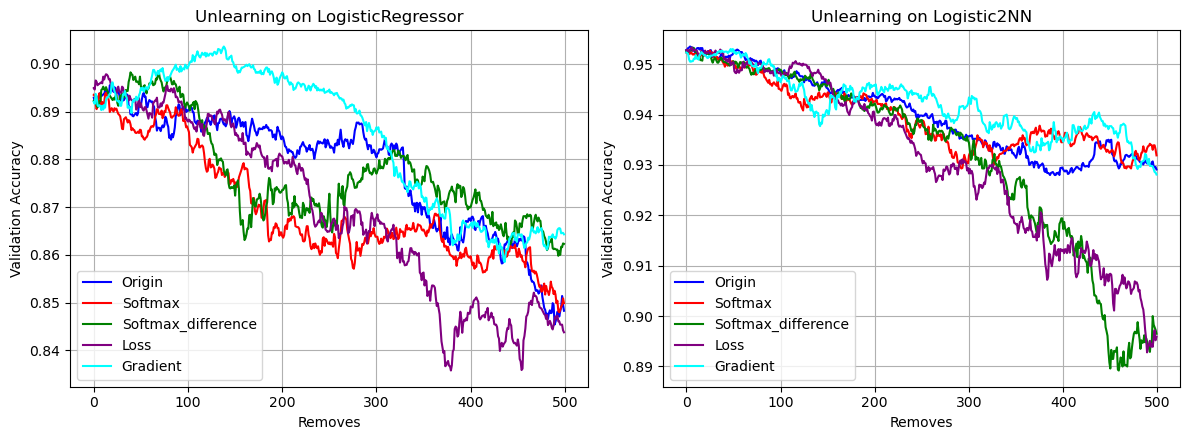

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 文件路径列表，确保按实际路径替换
group1_files = ['results_origin/mnist_logistic_FOCI.csv', 'results_origin/mnist_logistic_FOCI_max.csv', 'results_origin/mnist_logistic_FOCI_max_diff.csv', 'results_origin/mnist_logistic_FOCI_loss.csv', 'results_origin/mnist_logistic_FOCI_max_gradnorm.csv']
group2_files = ['results/mnist_2nn_FOCI.csv', 'results/mnist_2nn(white)_FOCI_max.csv', 'results/mnist_2nn(white)_FOCI_max_diff.csv', 'results/mnist_2nn(white)_FOCI_loss.csv', 'results/mnist_2nn(white)_FOCI_max_gradnorm.csv']

def plot_data(files, subplot, title):
    colors = ['blue', 'red', 'green', 'purple', 'cyan', 'orange', 'pink', 'brown', 'indigo', '#FFDD44']  # 确保颜色数量与文件数量一致
    labels = ['Origin', 'Softmax', 'Softmax_difference', 'Loss', 'Gradient']
    for i, file in enumerate(files):
        data = pd.read_csv(file)
        subplot.plot(data['n_removals'], data['val_acc_after'], label=labels[i], color=colors[i])
        subplot.set_xlabel('Removes')
        subplot.set_ylabel('Validation Accuracy')
        subplot.legend()
        subplot.grid(True)  # 启用背景网格
        subplot.set_title(title)  # 设置子图的标题

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))  # 创建1行2列的子图

# 绘制第一组数据，添加标题
plot_data(group1_files, ax1, "Unlearning on LogisticRegressor")

# 绘制第二组数据，添加标题
plot_data(group2_files, ax2, "Unlearning on Logistic2NN")

plt.tight_layout()
plt.show()